#  <font color='red'> Maximum Likelihood Estimation: Example 4 </font> 
 

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


import numpy as np
import scipy as sc
from scipy.stats import multivariate_normal
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 10]
import matplotlib.image as mpimg
from mpl_toolkits import mplot3d 



## Definition of the 1-D Gaussian function


In [2]:
def Gaussian(x,mu,sigma):
    Delta_squared = np.square((x-mu)/sigma)
    P = 1/np.sqrt(2*np.pi*np.square(sigma))*np.exp(-Delta_squared/2)
    return P

## Definition of the point likelihood in line fitting

In [3]:
def PointLikelihood(x,y,m,c,sigma):
    ypred = m*x+c
    return(Gaussian(ypred,y,sigma))

## Example 4: Main part

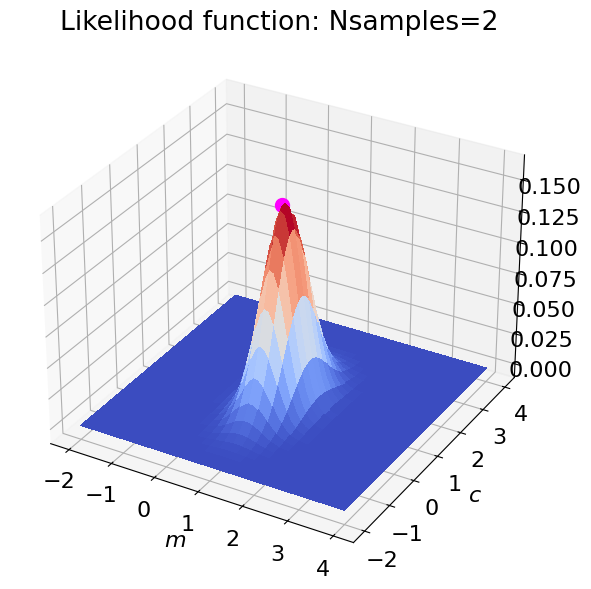

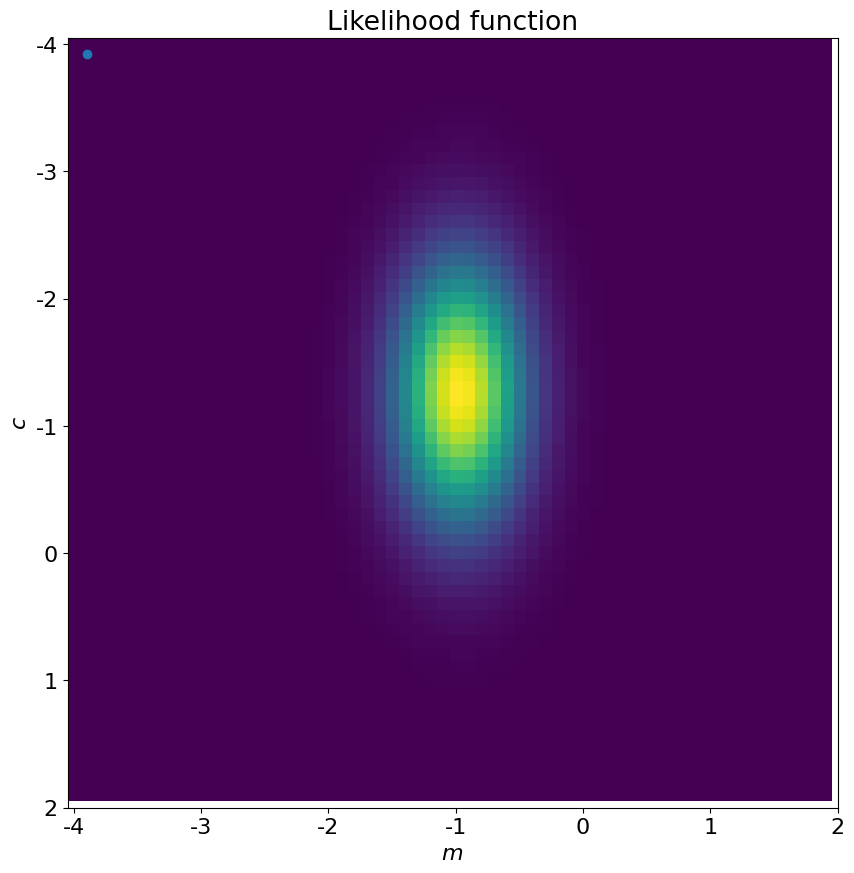

In [5]:
sigma = 1
m = 1
c = 1
Ngrid = 60

mgrid = np.linspace(-2, 4, Ngrid)
cgrid = np.linspace(-2,4,Ngrid)

# Noise realization
Nsamples = 2

x = np.linspace(-2,2,Nsamples)
yorig = m*x+c
y = yorig + np.random.normal(0,sigma,Nsamples)


fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 

mgrid, cgrid = np.meshgrid(mgrid, cgrid)

likelihood = PointLikelihood(x[0],y[0],mgrid,cgrid,sigma)
for i in range(1,Nsamples):
    g = PointLikelihood(x[i],y[i],mgrid,cgrid,sigma)
    likelihood = likelihood*g

# Plot the surface.
surf = ax.plot_surface(mgrid, cgrid, likelihood, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
cs = ax.set_xlabel("$m$")
cs = ax.set_ylabel('$c$')
plt.title('Likelihood function: Nsamples='+str(Nsamples))

## YOUR CODE HERE
# Modify the code below to compute the ML estimate
##------------------------------------------

coeffs = np.unravel_index(np.argmax(likelihood, axis=None), likelihood.shape)

m_ML = mgrid[coeffs]
c_ML = cgrid[coeffs]
##------------------------
ax = fig.gca()
maxvalue = np.max(likelihood)
ax.scatter3D(m_ML, c_ML,maxvalue, color = "magenta",s=100); 

# Show as an image

fig = plt.figure()
ax = fig.gca()

cs = ax.imshow(likelihood)
cs = ax.scatter(m_ML, c_ML)
cs = ax.set_xticks([0,10,20,30,40,50,60])
cs = ax.set_xticklabels([-4,-3,-2,-1,0,1,2])
cs = ax.set_xlabel('$m$')
cs = ax.set_yticks([0,10,20,30,40,50,60])
cs = ax.set_yticklabels([-4,-3,-2,-1,0,1,2])
cs = ax.set_ylabel('$c$')
cs = ax.set_title("Likelihood function")

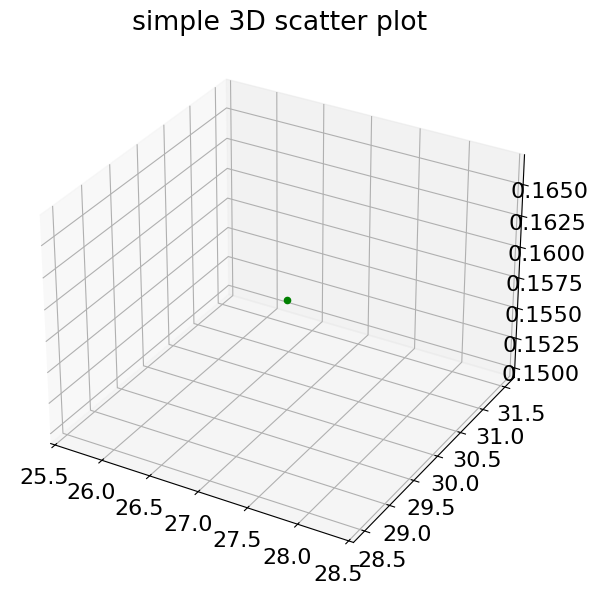

In [6]:
z = np.random.randint(100, size =(1)) 
x = np.random.randint(80, size =(1)) 
y = np.random.randint(60, size =(1)) 
  
# Creating figure 
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
  
# Creating plot 
ax.scatter3D(coeffs[0], coeffs[1],maxvalue, color = "green"); 
plt.title("simple 3D scatter plot") 
  
# show plot 
plt.show() 